In [ ]:
# Importiamo tutte le librerie necessarie per la nostra analisi. Utilizzeremo:
import numpy as np              # Per operazioni matematiche e manipolazione di array
import pandas as pd             # Per la gestione e analisi dei dati in formato tabellare
import matplotlib.pyplot as plt # Per creazione di grafici
import seaborn as sns           # Per visualizzazioni statistiche avanzate

# Librerie specifiche per machine learning da scikit-learn
from sklearn import datasets                                    # Per caricare il dataset
from sklearn.model_selection import train_test_split            # Per dividere i dati in set di training e test
from sklearn.model_selection import GridSearchCV, cross_val_score # Per ottimizzazione e validazione
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Per normalizzare i dati
from sklearn.decomposition import PCA                           # Per riduzione dimensionale
from sklearn.pipeline import Pipeline                           # Per creare pipeline di preprocessamento+modello

# Metriche di valutazione
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modelli di classificazione
from sklearn.linear_model import LogisticRegression    # Regressione logistica
from sklearn.neighbors import KNeighborsClassifier     # K-Nearest Neighbors
from sklearn.svm import SVC                            # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier        # Decision Tree
from sklearn.ensemble import (                         # Ensemble methods
    RandomForestClassifier,
    GradientBoostingClassifier
)
from sklearn.neural_network import MLPClassifier      # Multi-layer Perceptron (reti neurali)

# Per salvare i modelli
import joblib

# Per ignorare i warning (opzionale)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Configurazione per i grafici
sns.set_style("whitegrid")          # Stile per i grafici di Seaborn
sns.set_palette("Set2")             # Palette di colori
sns.set_context("notebook", font_scale=1.2)  # Dimensione del testo

# Configurazione per mostrare i grafici inline in Jupyter/Colab
%matplotlib inline

In [ ]:

# Carica il dataset da un file locale o da un URL
df = pd.read_csv('/content/sample_data/titanic.csv')  # Sostituisci 'titanic.csv' con il percorso corretto del file



In [ ]:
print("\n Statistiche descrittive:")
print(df.describe())


 Statistiche descrittive:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  



Diversi grafici di distribuzione


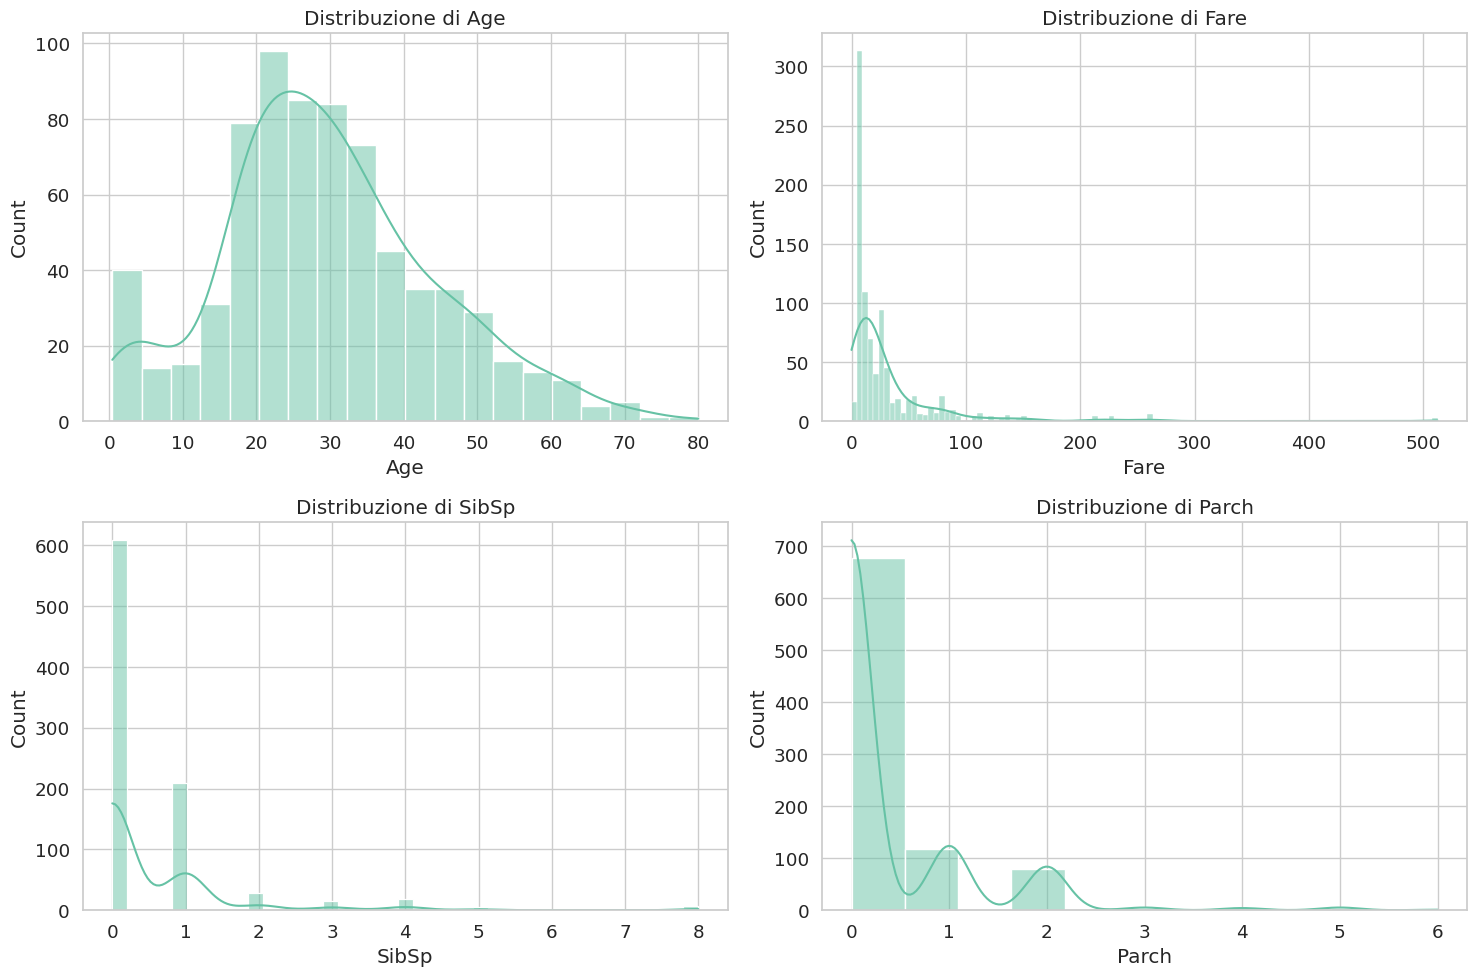

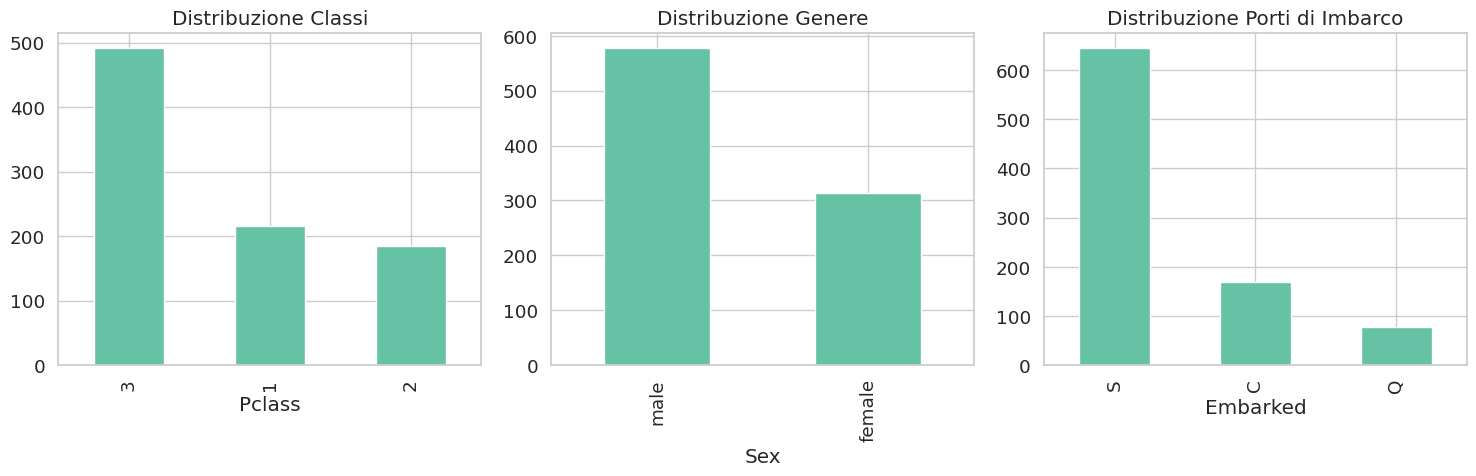

In [ ]:


# Visualizzazione delle distribuzioni
plt.figure(figsize=(15, 10))

print("\nDiversi grafici di distribuzione")
# Distribuzione delle variabili numeriche
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribuzione di {col}')

plt.tight_layout()
plt.show()

# Distribuzione delle variabili categoriche
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df['Pclass'].value_counts().plot(kind='bar')
plt.title('Distribuzione Classi')

plt.subplot(1, 3, 2)
df['Sex'].value_counts().plot(kind='bar')
plt.title('Distribuzione Genere')

plt.subplot(1, 3, 3)
df['Embarked'].value_counts().plot(kind='bar')
plt.title('Distribuzione Porti di Imbarco')

plt.tight_layout()
plt.show()


Valori mancanti nel dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Numero di righe duplicate: 0
Dataset dopo rimozione duplicati: 891 righe (erano 891)

Outliers nelle variabili numeriche:


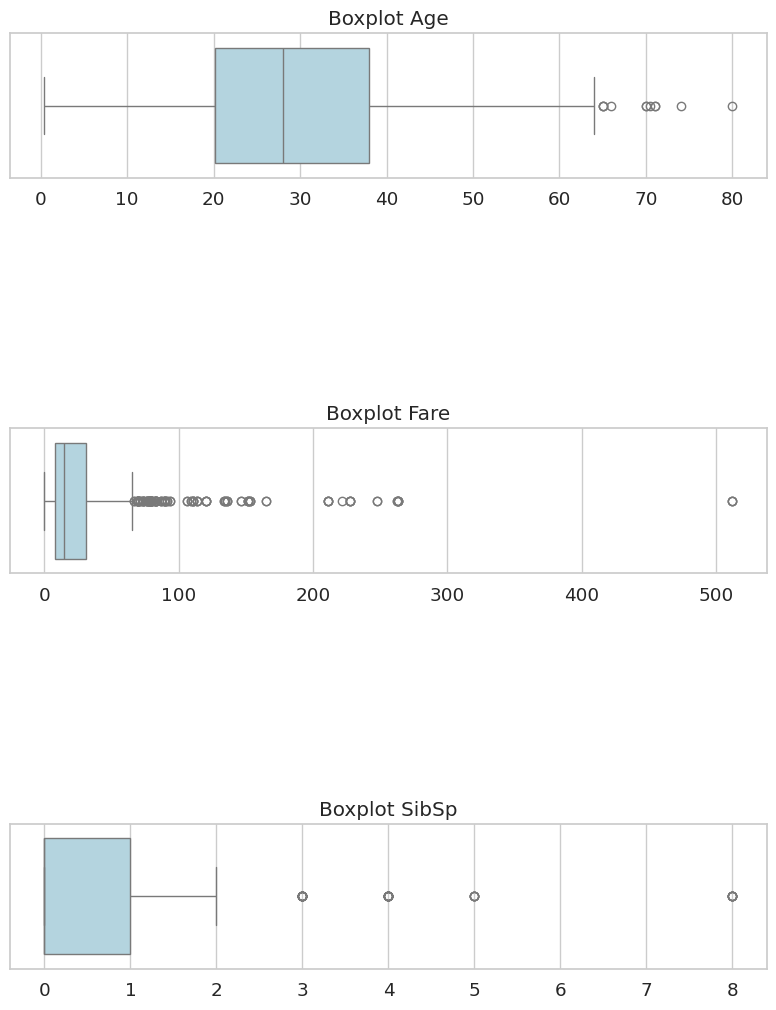


Outliers in Age: 11

Outliers in Fare: 116

Outliers in SibSp: 46


In [ ]:
# Controllo dei valori mancanti
print("\nValori mancanti nel dataset:")
print(df.isnull().sum())

# Controllo dei duplicati
print("\nNumero di righe duplicate:", df.duplicated().sum())

# Rimozione dei duplicati (se presenti)
df_clean = df.drop_duplicates().reset_index(drop=True)
print(f"Dataset dopo rimozione duplicati: {df_clean.shape[0]} righe (erano {df.shape[0]})")

df['Embarked'].fillna(most_common_port, inplace=True)

# Identificazione degli outliers
print("\nOutliers nelle variabili numeriche:")
numeric_cols = ['Age', 'Fare', 'SibSp']

# Boxplot e Violin Plot disposti verticalmente
plt.figure(figsize=(8, 4 * len(numeric_cols)))  # Altezza dinamica in base al numero di colonne numeriche

for i, col in enumerate(numeric_cols):
    # Boxplot
    plt.subplot(len(numeric_cols) * 2, 1, i * 2 + 1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot {col}')
    plt.xlabel("")  # Rimuove etichetta X per estetica

plt.tight_layout()
plt.show()

# Metodo statistico per identificare outliers (IQR)
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

for col in numeric_cols:
    outliers = detect_outliers(df, col)
    print(f"\nOutliers in {col}: {len(outliers)}")


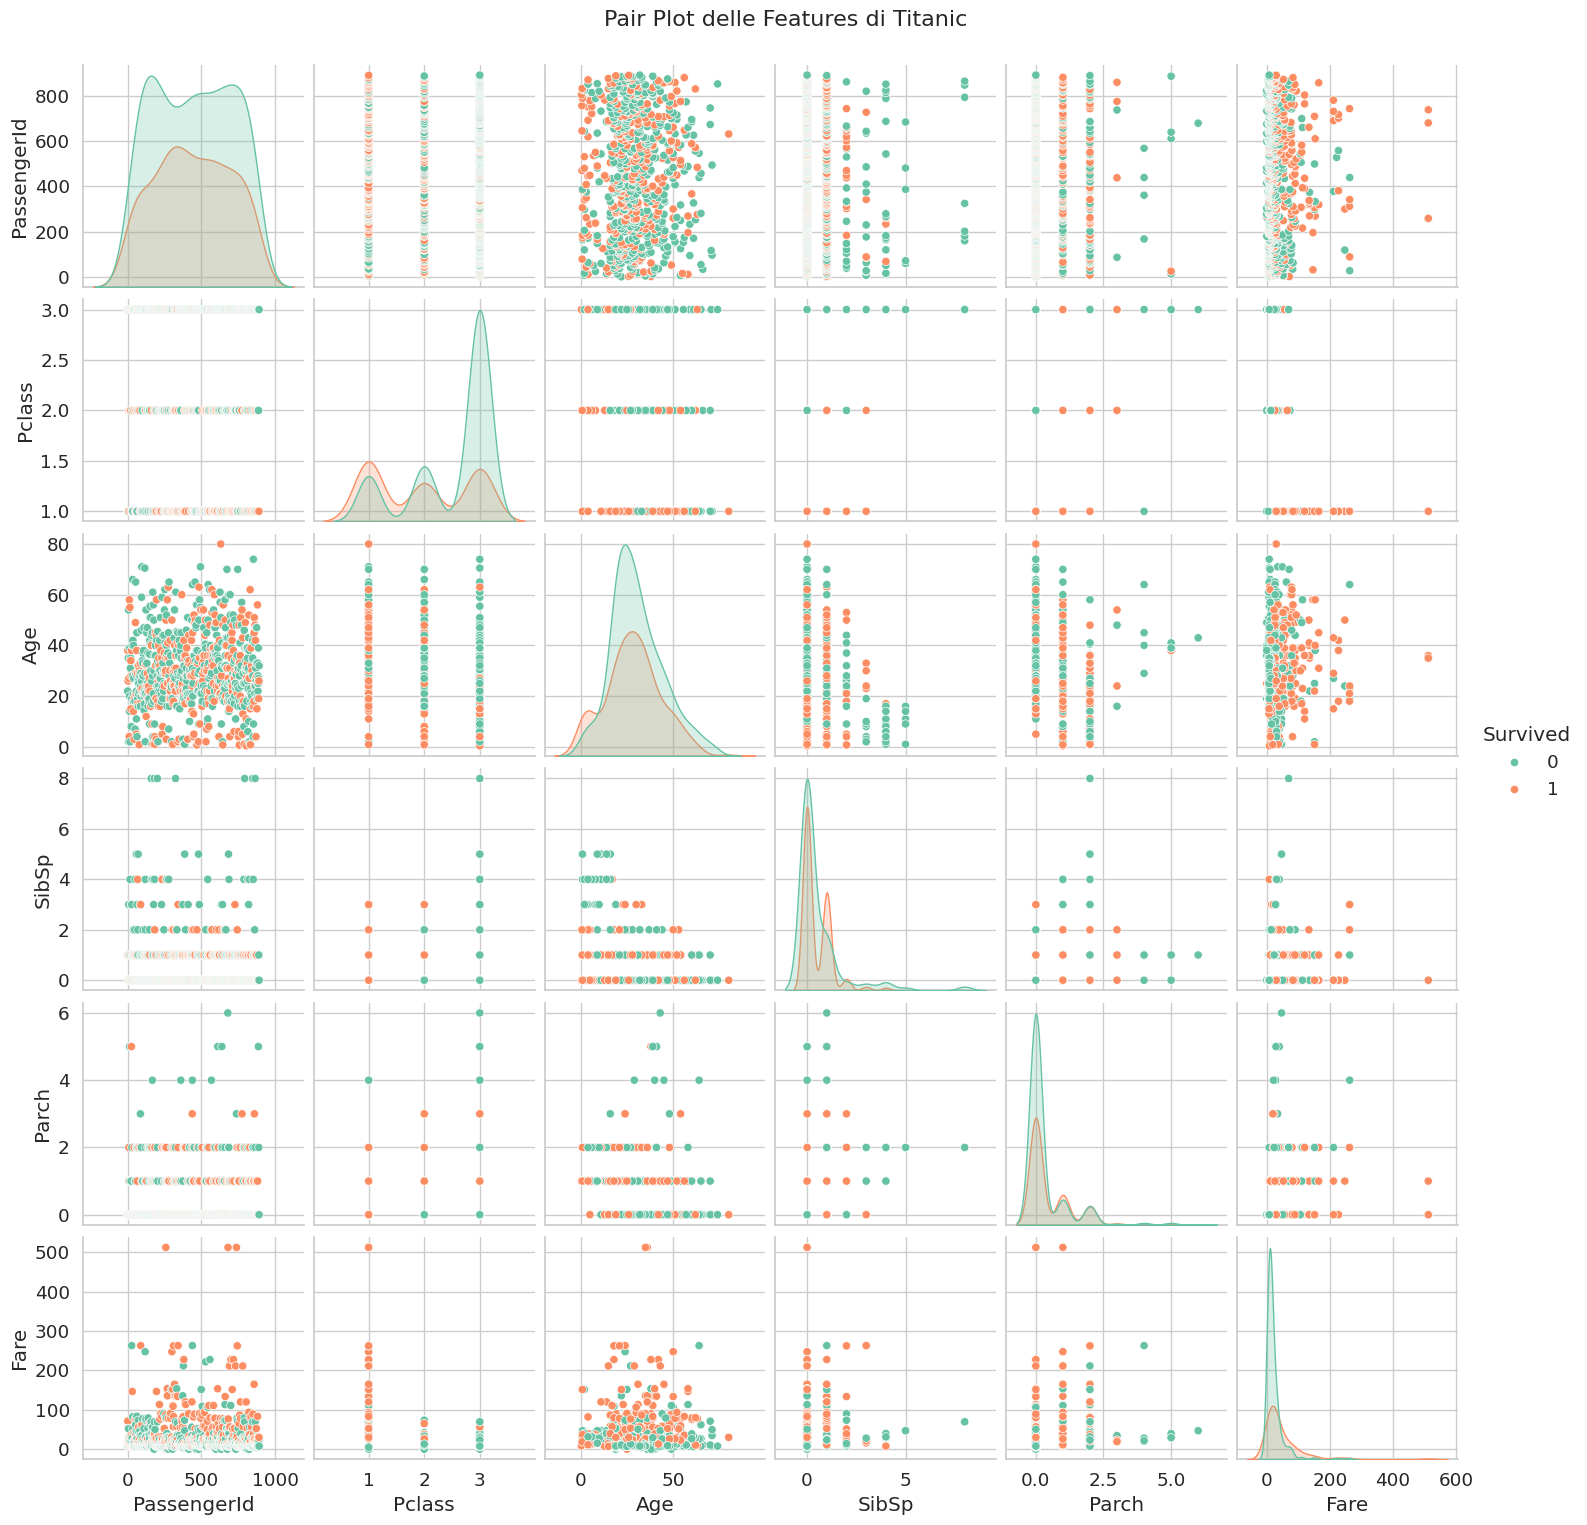

In [ ]:
# Pair plot di tutte le features
pair_plot = sns.pairplot(df, hue='Survived', height = 2.5) # Sostituisci 'Survived' con la colonna che vuoi usare per il colore dei punti
#Assegna il risultato di sns.pairplot a pair_plot
pair_plot.fig.suptitle('Pair Plot delle Features di Titanic', y=1.02, fontsize=16)
plt.show()

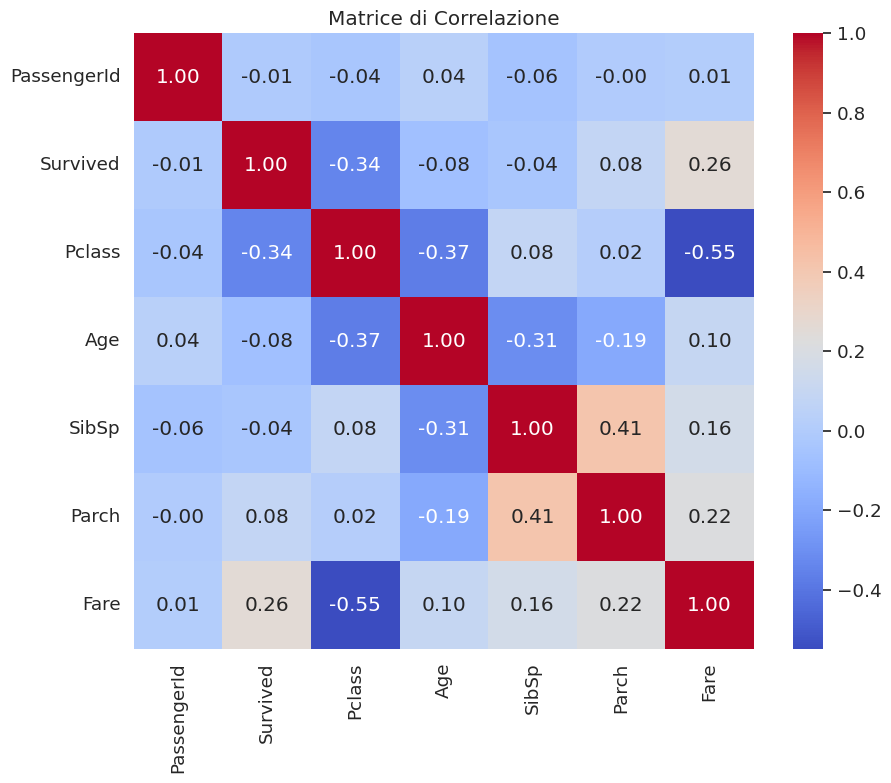

In [ ]:
# Calcola la matrice di correlazione solo per le colonne numeriche
correlation_matrix = df.select_dtypes(include=np.number).corr() # Seleziona solo le colonne numeriche prima di calcolare la correlazione

# Visualizza la matrice di correlazione come heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione')
plt.show()

In [ ]:
print("\n# 4. Preparazione dei dati per il machine learning")

# Definizione del target
target_col = 'Survived'

# Colonne da escludere dalle features
exclude_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin', target_col]

# Separazione delle features e del target
X = df_clean.drop(columns=exclude_cols)
y = df_clean[target_col]

# Se ci sono colonne categoriali, le possiamo codificare con get_dummies
X = pd.get_dummies(X, drop_first=True)

print(f"Shape delle features (X): {X.shape}")
print(f"Shape del target (y): {y.shape}")


# 4. Preparazione dei dati per il machine learning
Shape delle features (X): (891, 8)
Shape del target (y): (891,)


In [ ]:
# prompt: Dividi il dataset in : training 60%, validation 20%, test 20%

# ... (your existing code)

# 6.1 Divisione del dataset in training (60%), validation (20%) e test set (20%)
# Prima dividiamo tra training_val (80%) e test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% per il test set
    random_state=42,     # Seme per riproducibilità
    stratify=y           # Mantiene la proporzione delle classi
)

# Poi dividiamo training_val in training (75% del training_val = 60% del totale)
# e validation (25% del training_val = 20% del totale)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.25,      # 25% del training_val va al validation
    random_state=42,
    stratify=y_train_val
)

print(f"Dimensioni del training set: {X_train.shape}")
print(f"Dimensioni del validation set: {X_val.shape}")
print(f"Dimensioni del test set: {X_test.shape}")


Dimensioni del training set: (534, 8)
Dimensioni del validation set: (178, 8)
Dimensioni del test set: (179, 8)


In [ ]:
# prompt: Esegui la normalizzazione dei dati seguendo la StandardScaler e MinMaxScaler

# ... (your existing code)

# Normalizzazione dei dati con StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Normalizzazione dei dati con MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_val_minmax = minmax_scaler.transform(X_val)
X_test_minmax = minmax_scaler.transform(X_test)

print("Dati normalizzati con StandardScaler:")
print(X_train_scaled[:5])  # Stampa le prime 5 righe dei dati normalizzati

print("\nDati normalizzati con MinMaxScaler:")
print(X_train_minmax[:5]) # Stampa le prime 5 righe dei dati normalizzati con MinMaxScaler




Dati normalizzati con StandardScaler:
[[-1.57108416e+00  6.11966321e-01  4.68452763e-01 -4.71728177e-01
   5.34936778e-01 -1.35107247e+00 -2.88382212e-01  6.30797717e-01]
 [ 8.32809655e-01 -1.80147812e+00  2.32833213e+00  1.86070559e+00
  -7.26166260e-02  7.40152746e-01 -2.88382212e-01  6.30797717e-01]
 [ 8.32809655e-01 -8.36100344e-01  4.68452763e-01  6.94488704e-01
  -2.39422583e-01  7.40152746e-01 -2.88382212e-01  6.30797717e-01]
 [-1.57108416e+00  1.64629965e+00  4.68452763e-01 -4.71728177e-01
   6.10880954e-01 -1.35107247e+00 -2.88382212e-01 -1.58529426e+00]
 [ 8.32809655e-01  6.11966321e-01  4.68452763e-01  5.35935623e+00
   6.15257533e-04 -1.35107247e+00 -2.88382212e-01  6.30797717e-01]]

Dati normalizzati con MinMaxScaler:
[[0.         0.48479517 0.125      0.         0.10910953 0.
  0.         1.        ]
 [1.         0.04498618 0.375      0.33333333 0.05445717 1.
  0.         1.        ]
 [1.         0.22090978 0.125      0.16666667 0.03945217 1.
  0.         1.        ]
 [0.

Varianza spiegata da ciascuna componente principale: [0.23139942 0.20995897]


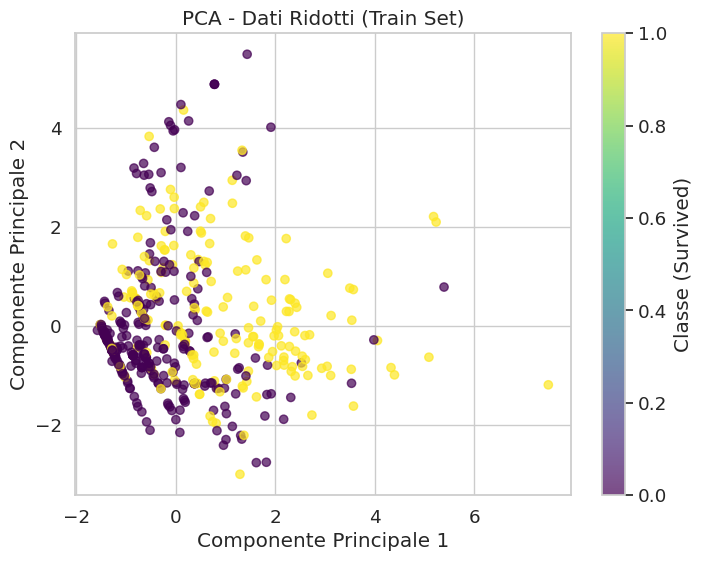

In [ ]:
from sklearn.impute import SimpleImputer

# Imputation BEFORE scaling
imputer = SimpleImputer(strategy='mean') # or other strategies like 'median', 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

# Now apply scaling
scaler = StandardScaler()
X_train_scaled_std = scaler.fit_transform(X_train)
X_val_scaled_std = scaler.transform(X_val)
X_test_scaled_std = scaler.transform(X_test)

# PCA: riduzione a 2 componenti
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled_std)
X_val_pca = pca.transform(X_val_scaled_std)
X_test_pca = pca.transform(X_test_scaled_std)

# Stampa la varianza spiegata
explained_variance = pca.explained_variance_ratio_
print(f"Varianza spiegata da ciascuna componente principale: {explained_variance}")

# Visualizzazione PCA (solo training set)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.title('PCA - Dati Ridotti (Train Set)')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.colorbar(scatter, label='Classe (Survived)')
plt.grid(True)
plt.show()

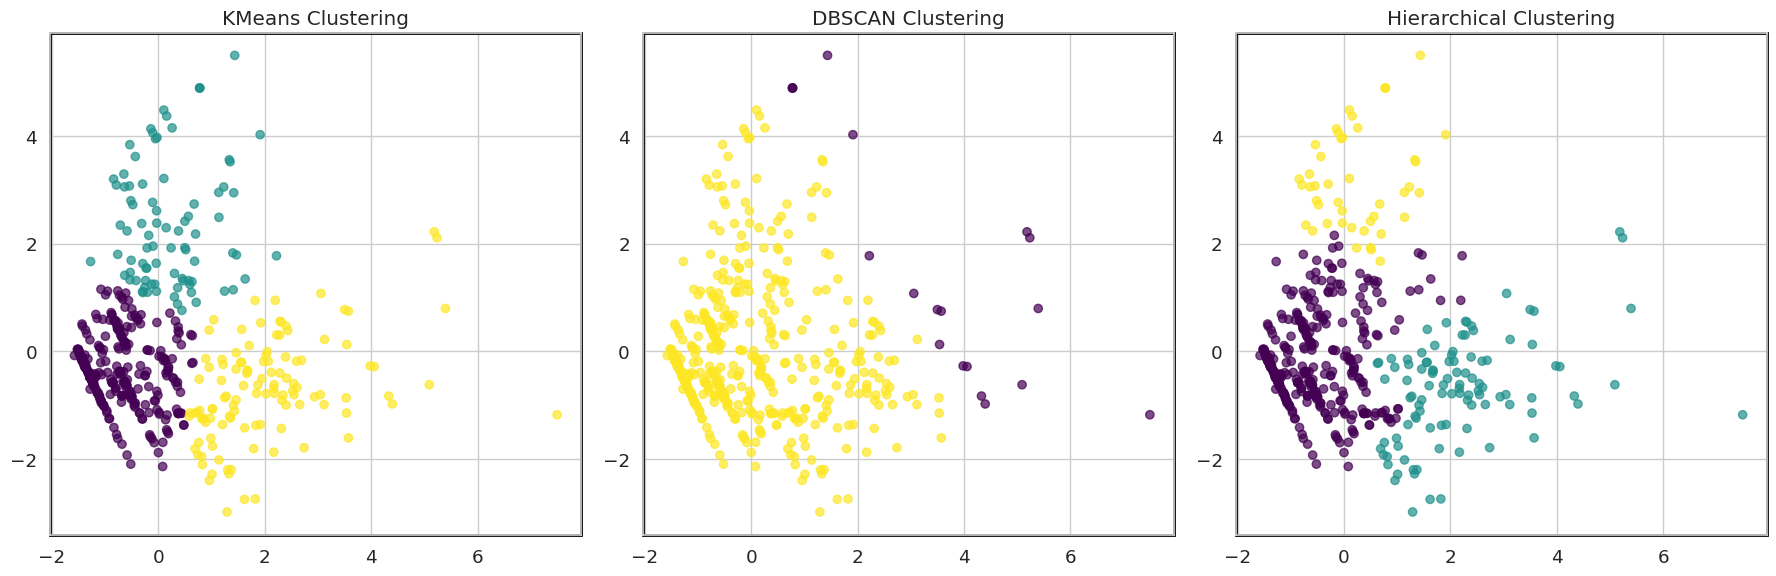

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_pca)
kmeans_labels = kmeans.labels_

dbscan = DBSCAN(eps=0.61, min_samples=5)
dbscan.fit(X_train_pca)
dbscan_labels = dbscan.labels_

hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical.fit(X_train_pca)
hierarchical_labels = hierarchical.labels_

# Visualizzazione con bordo attorno a ciascun grafico
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

titles = ['KMeans Clustering', 'DBSCAN Clustering', 'Hierarchical Clustering']
cluster_labels = [kmeans_labels, dbscan_labels, hierarchical_labels]

for i in range(3):
    axs[i].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=cluster_labels[i], cmap='viridis', alpha=0.7)
    axs[i].set_title(titles[i])

    # Aggiungi bordo nero attorno al grafico
    axs[i].add_patch(Rectangle(
        (0, 0), 1, 1,
        transform=axs[i].transAxes,
        fill=False,
        color='black',
        linewidth=2,
        clip_on=False
    ))


plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.show()


In [ ]:
# ## 9. Implementazione di Diversi Modelli di Machine Learning
#
# Implementiamo e confrontiamo diversi algoritmi di machine learning.
target_names = ['Not Survived', 'Survived']
print("\n# 5. Implementazione e addestramento di diversi modelli di machine learning")
# Definizione di una funzione per valutare i modelli
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    """
    Addestra un modello e lo valuta sul validation set

    Args:
        model: il modello da addestrare
        X_train, y_train: dati di training
        X_val, y_val: dati di validation
        model_name: nome del modello per il reporting

    Returns:
        model: il modello addestrato
        accuracy: l'accuratezza sul validation set
    """
    # Addestramento
    model.fit(X_train, y_train)

    # Predizioni sul validation set
    y_val_pred = model.predict(X_val)

    # Calcolo dell'accuratezza
    accuracy = accuracy_score(y_val, y_val_pred)

    # Cross-validation sul training set
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Stampa dei risultati
    print(f"\n{model_name}:")
    print(f"Accuratezza sul validation set: {accuracy:.4f}")
    print(f"Accuratezza media con 5-fold CV: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # TEORIA: Cross-validation (CV)
    # - Divide il training set in k fold (qui k=5)
    # - Addestra su k-1 fold e valuta sul fold rimanente
    # - Ripete k volte, usando un fold diverso per la valutazione
    # - Calcola la media e deviazione standard dell'accuratezza
    # - Fornisce una stima più robusta della performance del modello

    # Classification report e confusion matrix
    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred, target_names=target_names))

    # TEORIA: Metriche di valutazione
    # - Precision: % di predizioni positive corrette (TP / (TP + FP))
    # - Recall: % di positivi reali identificati (TP / (TP + FN))
    # - F1-score: media armonica di precision e recall
    # - Support: numero di occorrenze di ogni classe

    # Confusion Matrix con heatmap
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Matrice di Confusione - {model_name}')
    plt.ylabel('Etichetta Reale')
    plt.xlabel('Etichetta Predetta')
    plt.tight_layout()
    plt.show()

    # TEORIA: Matrice di Confusione
    # - Righe: classe reale
    # - Colonne: classe predetta
    # - Diagonale: predizioni corrette
    # - Fuori diagonale: errori
    # - Utile per identificare quali classi vengono confuse tra loro

    return model, accuracy

# Utilizzeremo i dati normalizzati con StandardScaler per tutti i modelli
# in quanto funziona meglio per la maggior parte degli algoritmi



# 5. Implementazione e addestramento di diversi modelli di machine learning



Logistic Regression:
Accuratezza sul validation set: 0.7978
Accuratezza media con 5-fold CV: 0.8032 ± 0.0515

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.82      0.86      0.84       110
    Survived       0.76      0.69      0.72        68

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



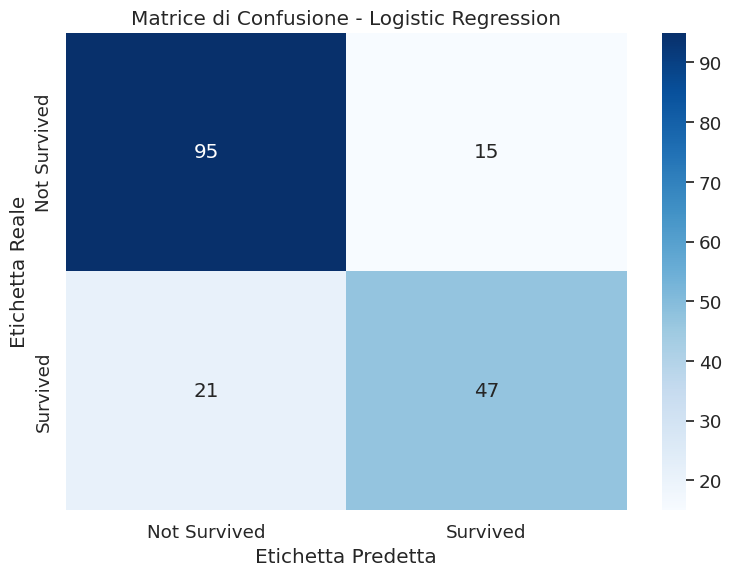

In [ ]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model, lr_accuracy = evaluate_model(lr_model, X_train_scaled_std, y_train, X_val_scaled_std, y_val, "Logistic Regression")


K-Nearest Neighbors:
Accuratezza sul validation set: 0.8202
Accuratezza media con 5-fold CV: 0.7807 ± 0.0568

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.84      0.87      0.86       110
    Survived       0.78      0.74      0.76        68

    accuracy                           0.82       178
   macro avg       0.81      0.80      0.81       178
weighted avg       0.82      0.82      0.82       178



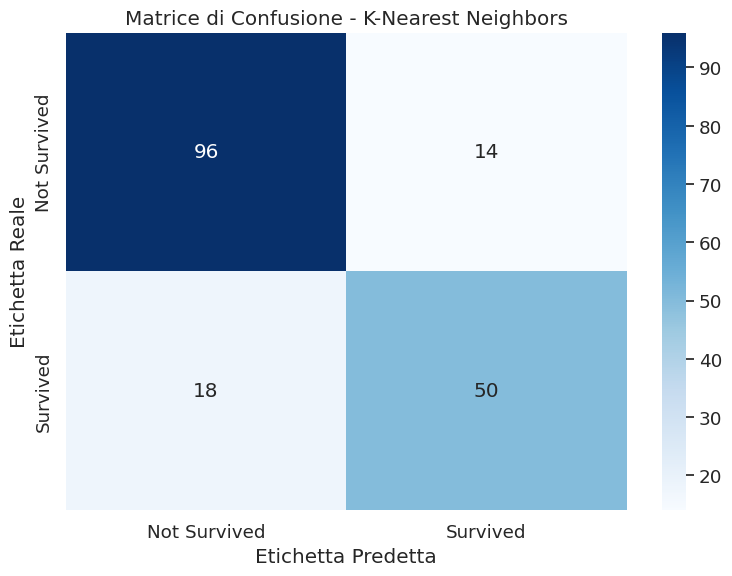

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model, knn_accuracy = evaluate_model(knn_model, X_train_scaled_std, y_train, X_val_scaled_std, y_val, "K-Nearest Neighbors")


Support Vector Machine:
Accuratezza sul validation set: 0.8539
Accuratezza media con 5-fold CV: 0.8126 ± 0.0428

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.84      0.95      0.89       110
    Survived       0.89      0.71      0.79        68

    accuracy                           0.85       178
   macro avg       0.86      0.83      0.84       178
weighted avg       0.86      0.85      0.85       178



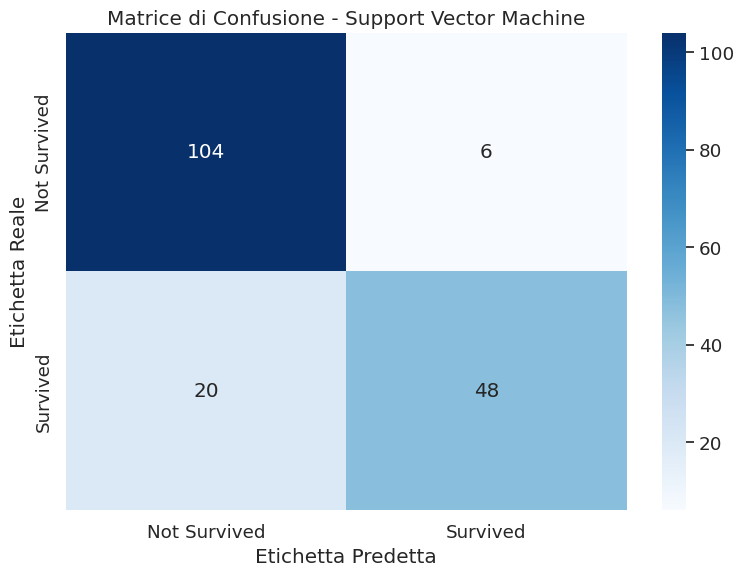

In [ ]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model, svm_accuracy = evaluate_model(svm_model, X_train_scaled_std, y_train, X_val_scaled_std, y_val, "Support Vector Machine")


Decision Tree:
Accuratezza sul validation set: 0.7865
Accuratezza media con 5-fold CV: 0.7583 ± 0.0433

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.84      0.81      0.82       110
    Survived       0.71      0.75      0.73        68

    accuracy                           0.79       178
   macro avg       0.77      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



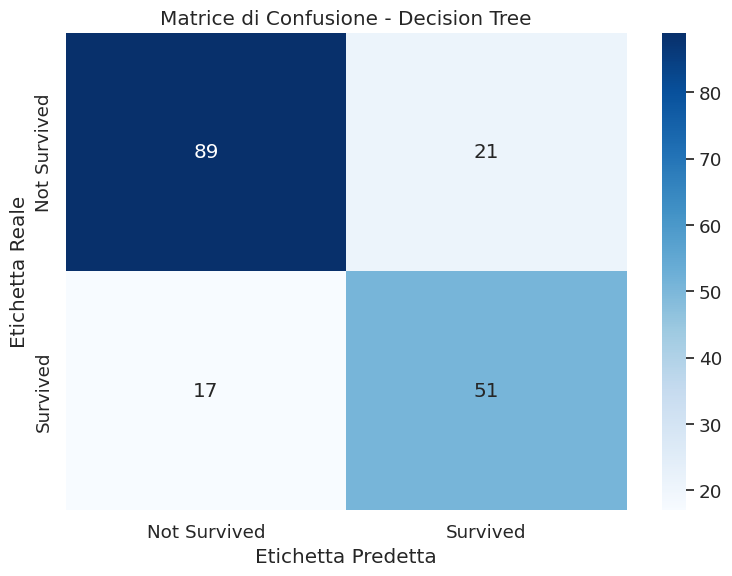

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model, dt_accuracy = evaluate_model(dt_model, X_train_scaled_std, y_train, X_val_scaled_std, y_val, "Decision Tree")


Random Forest:
Accuratezza sul validation set: 0.8258
Accuratezza media con 5-fold CV: 0.7920 ± 0.0354

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.86      0.86      0.86       110
    Survived       0.78      0.76      0.77        68

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



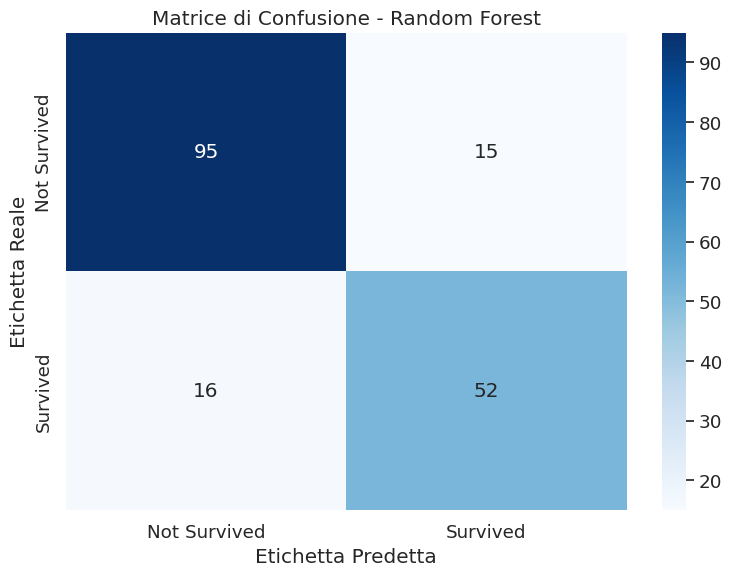

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model, rf_accuracy = evaluate_model(rf_model, X_train_scaled_std, y_train, X_val_scaled_std, y_val, "Random Forest")


Gradient Boosting:
Accuratezza sul validation set: 0.8483
Accuratezza media con 5-fold CV: 0.8219 ± 0.0503

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.85      0.91      0.88       110
    Survived       0.84      0.75      0.79        68

    accuracy                           0.85       178
   macro avg       0.85      0.83      0.84       178
weighted avg       0.85      0.85      0.85       178



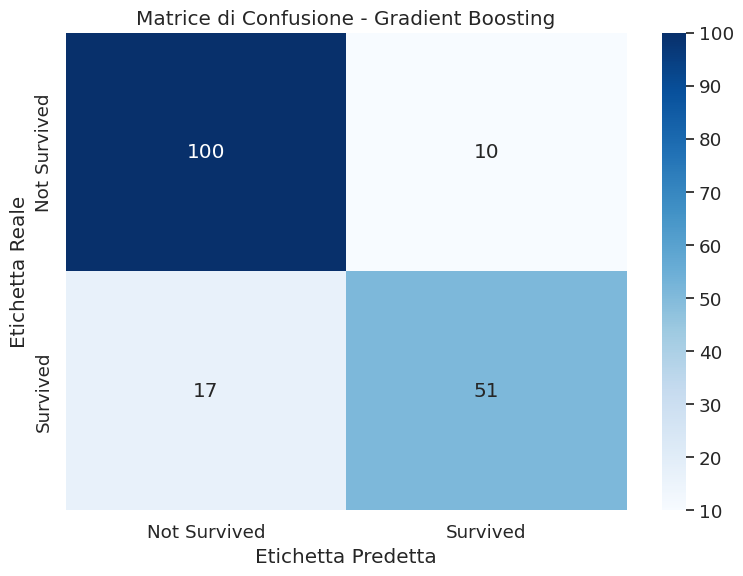

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model, gb_accuracy = evaluate_model(gb_model, X_train_scaled_std, y_train, X_val_scaled_std, y_val, "Gradient Boosting")


Neural Network (MLP):
Accuratezza sul validation set: 0.8371
Accuratezza media con 5-fold CV: 0.8052 ± 0.0448

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.84      0.91      0.87       110
    Survived       0.83      0.72      0.77        68

    accuracy                           0.84       178
   macro avg       0.84      0.81      0.82       178
weighted avg       0.84      0.84      0.83       178



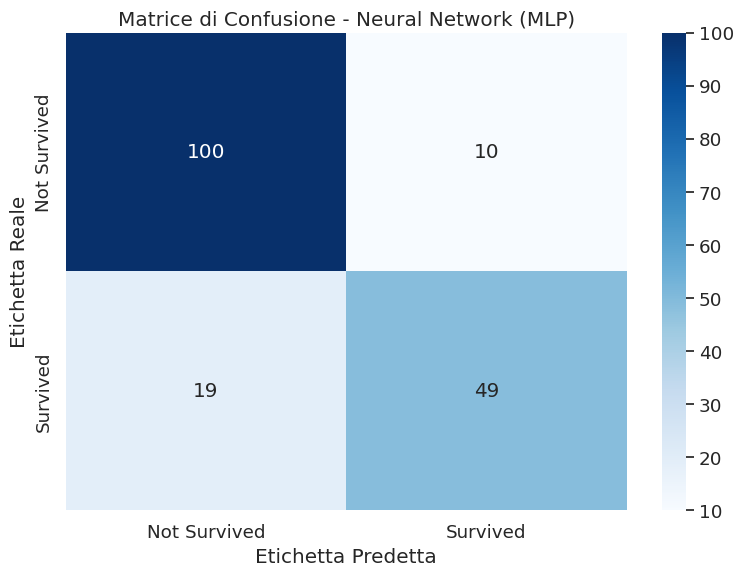

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=1000, random_state=42)
mlp_model, mlp_accuracy = evaluate_model(mlp_model, X_train_scaled_std, y_train, X_val_scaled_std, y_val, "Neural Network (MLP)")

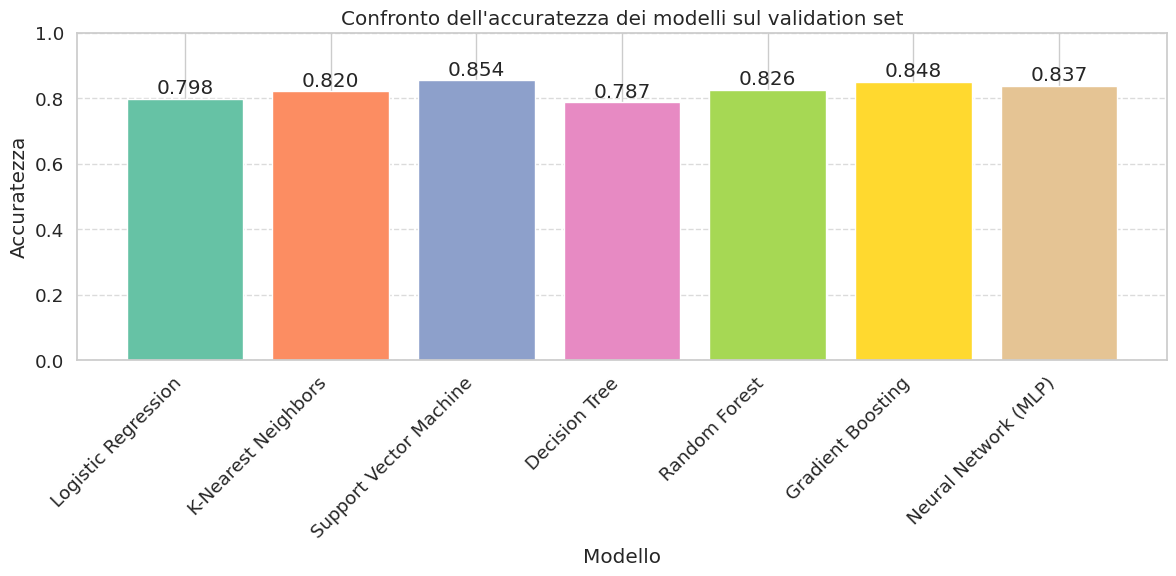


Il miglior modello è Support Vector Machine con un'accuratezza di 0.8539


In [ ]:
# ## 10. Valutazione e Confronto dei Modelli
#
# Confrontiamo le performance dei diversi modelli per scegliere il migliore.

# Confronto dei modelli
models = ["Logistic Regression", "K-Nearest Neighbors", "Support Vector Machine",
          "Decision Tree", "Random Forest", "Gradient Boosting", "Neural Network (MLP)"]
accuracies = [lr_accuracy, knn_accuracy, svm_accuracy, dt_accuracy, rf_accuracy, gb_accuracy, mlp_accuracy]

plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies, color=sns.color_palette("Set2", len(models)))
plt.title('Confronto dell\'accuratezza dei modelli sul validation set')
plt.xlabel('Modello')
plt.ylabel('Accuratezza')
plt.xticks(rotation=45, ha='right')
plt.ylim(0., 1.0)  # Zoom in sulle accuratezze rilevanti

# Aggiungiamo i valori sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Selezione del miglior modello in base all'accuratezza sul validation set
best_acc = max(accuracies)
best_model_idx = accuracies.index(best_acc)
best_model_name = models[best_model_idx]
print(f"\nIl miglior modello è {best_model_name} con un'accuratezza di {best_acc:.4f}")

# TEORIA: Perché confrontiamo diversi modelli?
# - Ogni algoritmo ha punti di forza e debolezze
# - Non esiste un algoritmo "migliore" per tutti i problemi (No Free Lunch Theorem)
# - La performance dipende dalla natura dei dati, dalla quantità di dati, dal rumore, ecc.
# - È buona pratica provare diversi algoritmi e selezionare il migliore
# - L'accuratezza non è l'unica metrica importante: considerare anche precision, recall,
#   tempo di addestramento, interpretabilità, ecc.

In [ ]:
# ## 11. Ottimizzazione degli Iperparametri
#
# Ottimizziamo gli iperparametri dei modelli migliori per migliorare ulteriormente le performance.

print("\n# 6. Ottimizzazione del modello con Grid Search")
# TEORIA: Ottimizzazione degli iperparametri
# - Gli iperparametri sono parametri che non vengono appresi dall'algoritmo durante l'addestramento
# - Esempi: C in SVM, numero di alberi in Random Forest, learning rate in Gradient Boosting
# - Grid Search: prova tutte le combinazioni possibili in una griglia di valori
# - Cross-validation: per ogni combinazione, valuta la performance con k-fold cross-validation
# - Obiettivo: trovare la combinazione che massimizza la performance

# Selezioniamo i 3 modelli migliori per l'ottimizzazione
top_models = [(svm_model, "SVM", {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['rbf', 'poly', 'sigmoid']
}),
(rf_model, "Random Forest", {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}),
(gb_model, "Gradient Boosting", {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5]
})]

best_models = {}



# 6. Ottimizzazione del modello con Grid Search


In [ ]:
# Per ciascuno dei 3 migliori modelli, eseguiamo la Grid Search
for model, name, params in top_models:
    print(f"\nOttimizzazione di {name} con Grid Search:")
    grid_search = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled_std, y_train)

    print(f"Migliori parametri: {grid_search.best_params_}")
    print(f"Miglior accuratezza CV: {grid_search.best_score_:.4f}")

    # Valutazione sul validation set
    best_model = grid_search.best_estimator_
    y_val_pred = best_model.predict(X_val_scaled_std)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Accuratezza sul validation set con i migliori parametri: {val_accuracy:.4f}")

    best_models[name] = (best_model, val_accuracy)

# Selezione del miglior modello ottimizzato
best_opt_model_name = max(best_models.items(), key=lambda x: x[1][1])[0]
best_opt_model, best_opt_accuracy = best_models[best_opt_model_name]

print(f"\nIl miglior modello ottimizzato è {best_opt_model_name} con un'accuratezza di {best_opt_accuracy:.4f}")

# TEORIA: Trappole da evitare nell'ottimizzazione
# - Utilizzare il test set per l'ottimizzazione: causa overfitting sul test set
# - Ottimizzare troppi parametri: aumenta il rischio di overfitting
# - Non considerare il tempo computazionale: alcune combinazioni possono essere molto lente
# - Grid Search vs Random Search:
#   * Grid Search: prova tutte le combinazioni (esaustivo ma costoso)
#   * Random Search: prova combinazioni casuali (più efficiente per molti parametri)



Ottimizzazione di SVM con Grid Search:
Migliori parametri: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Miglior accuratezza CV: 0.8109
Accuratezza sul validation set con i migliori parametri: 0.8596

Ottimizzazione di Random Forest con Grid Search:
Migliori parametri: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Miglior accuratezza CV: 0.8146
Accuratezza sul validation set con i migliori parametri: 0.8146

Ottimizzazione di Gradient Boosting con Grid Search:
Migliori parametri: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 100}
Miglior accuratezza CV: 0.8258
Accuratezza sul validation set con i migliori parametri: 0.8371

Il miglior modello ottimizzato è SVM con un'accuratezza di 0.8596



# 7. Valutazione finale sul test set
Accuratezza del miglior modello (SVM) sul test set: 0.8045

Classification Report sul test set:
              precision    recall  f1-score   support

Not Survived       0.79      0.94      0.85       110
    Survived       0.85      0.59      0.70        69

    accuracy                           0.80       179
   macro avg       0.82      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179



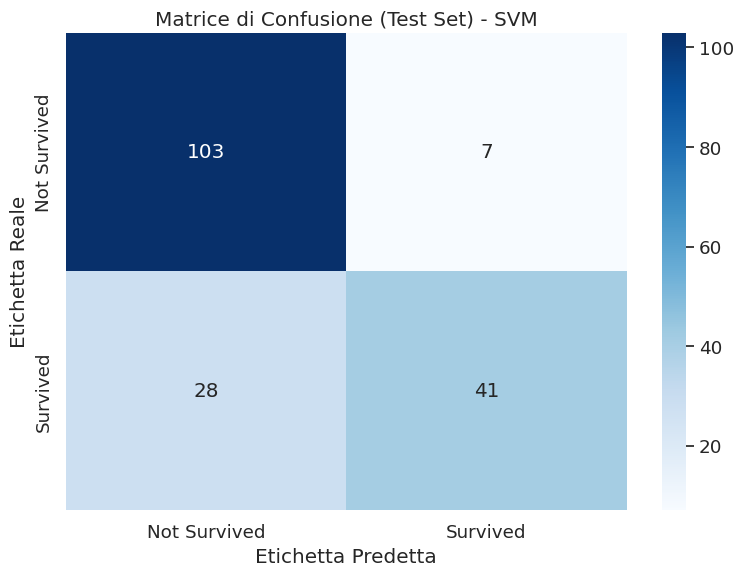

In [ ]:
# ## 12. Valutazione Finale sul Test Set
#
# Valutiamo il modello ottimizzato sul test set, che non è mai stato utilizzato prima.

print("\n# 7. Valutazione finale sul test set")
# Effettuiamo la valutazione finale sul test set con il miglior modello ottimizzato
y_test_pred = best_opt_model.predict(X_test_scaled_std)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuratezza del miglior modello ({best_opt_model_name}) sul test set: {test_accuracy:.4f}")
print("\nClassification Report sul test set:")
print(classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion Matrix sul test set
plt.figure(figsize=(8, 6))
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title(f'Matrice di Confusione (Test Set) - {best_opt_model_name}')
plt.ylabel('Etichetta Reale')
plt.xlabel('Etichetta Predetta')
plt.tight_layout()
plt.show()

# TEORIA: Importanza della valutazione sul test set
# - Il test set fornisce una stima imparziale della performance su dati nuovi
# - Se la performance sul test set è significativamente peggiore di quella sul validation,
#   potrebbe esserci overfitting
# - L'accuratezza sul test set è la metrica che dovremmo riportare come risultato finale
# - È importante non "toccare" mai il test set fino alla valutazione finale
